In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# Loading the housing price dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:

# Create the crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Display the result
print(crosstab_result)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [10]:

import scipy.stats as stats
# Create the contingency table
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)

# Display results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-square Statistic: 36540.20270061387
P-value: 0.0
Degrees of Freedom: 295


In [11]:
# Compute Cramér's V
n = crosstab.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.1222829439760564


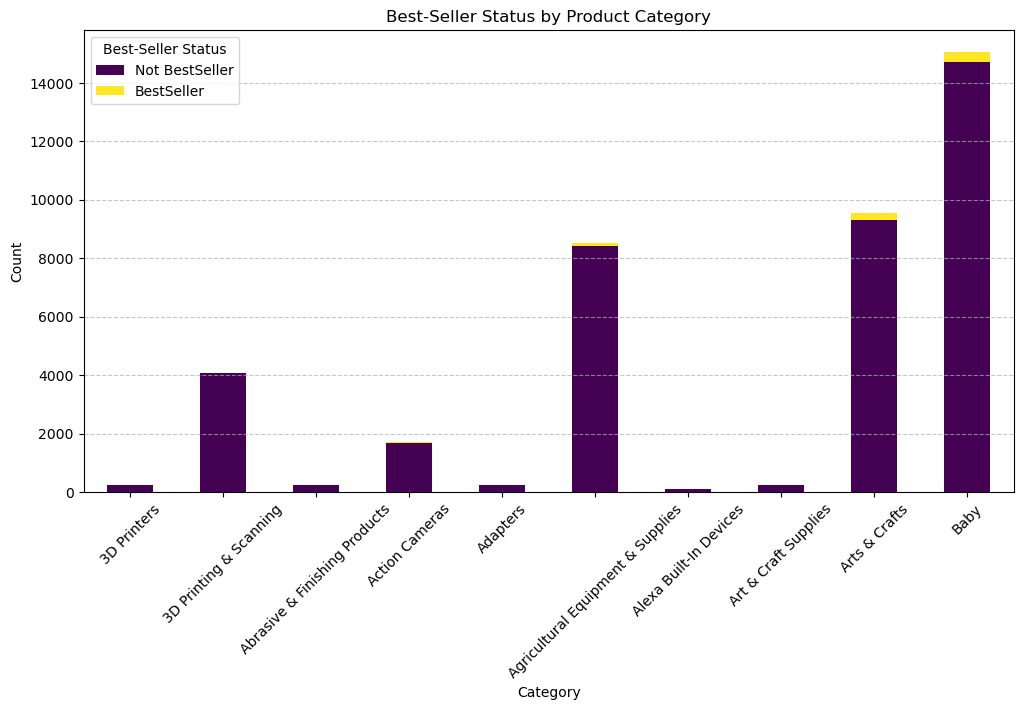

In [13]:

crosstab = pd.crosstab(df['category'], df['isBestSeller']).head(10)

crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Best-Seller Status by Product Category")
plt.legend(title="Best-Seller Status", labels=["Not BestSeller", "BestSeller"])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ELOHOR\AppData\Local\Temp\ipykernel_22232\335848469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')


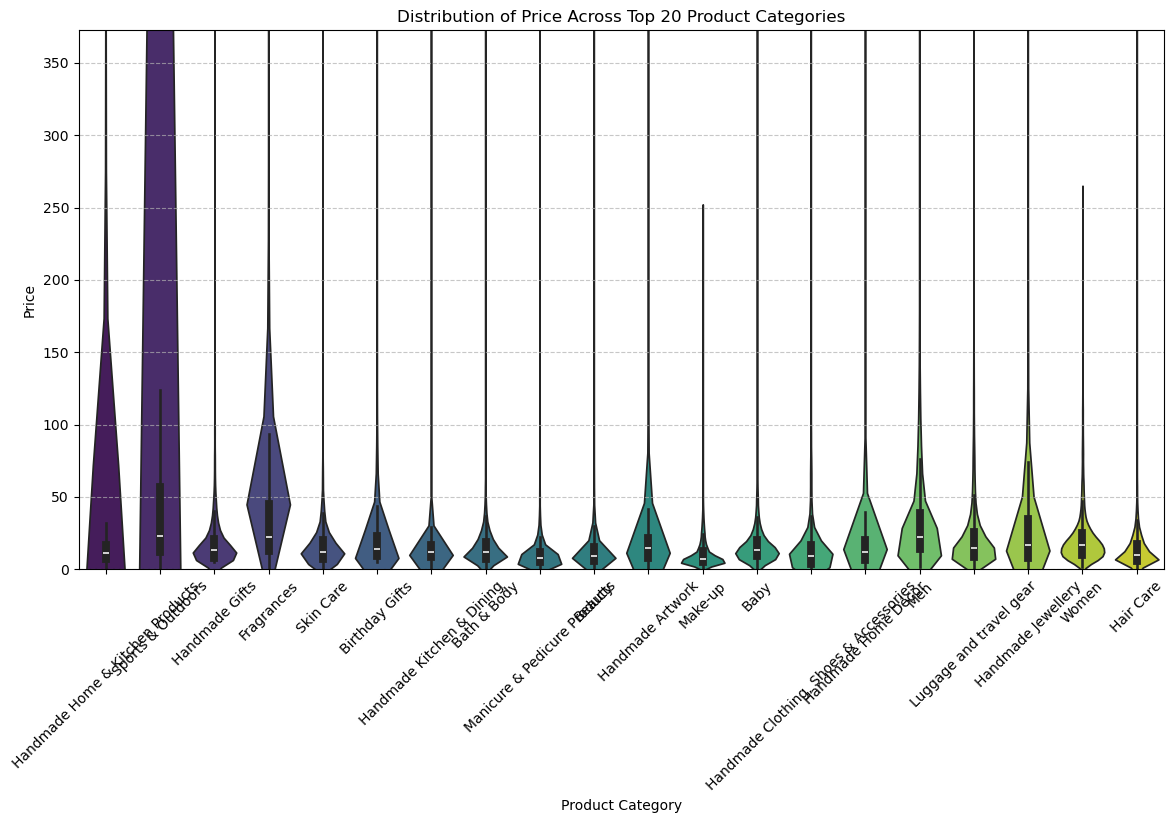

In [14]:

top_categories = df['category'].value_counts().head(20).index
df_filtered = df[df['category'].isin(top_categories)]
plt.figure(figsize=(14, 7))
sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')

plt.xlabel("Product Category")
plt.ylabel("Price")
plt.title("Distribution of Price Across Top 20 Product Categories")
plt.xticks(rotation=45)  
plt.ylim(0, df_filtered['price'].quantile(0.95)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ELOHOR\AppData\Local\Temp\ipykernel_22232\602584296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')


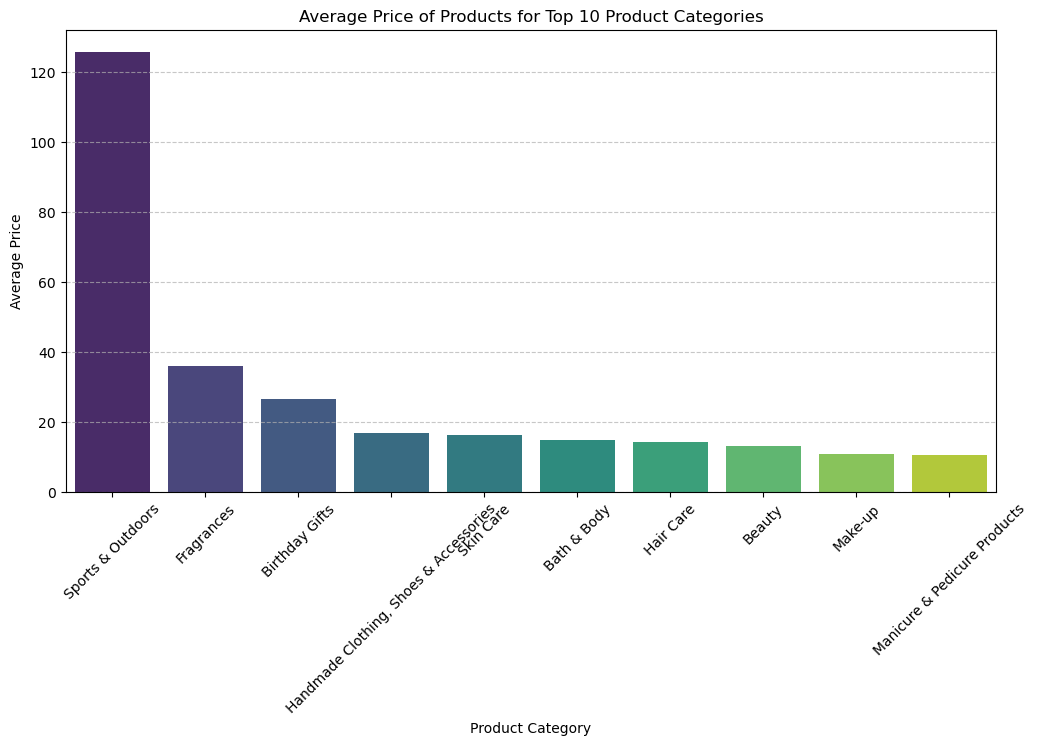

In [15]:

top_categories = df['category'].value_counts().head(10).index
df_filtered = df[df['category'].isin(top_categories)]
avg_price_per_category = df_filtered.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price of Products for Top 10 Product Categories")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x600 with 0 Axes>

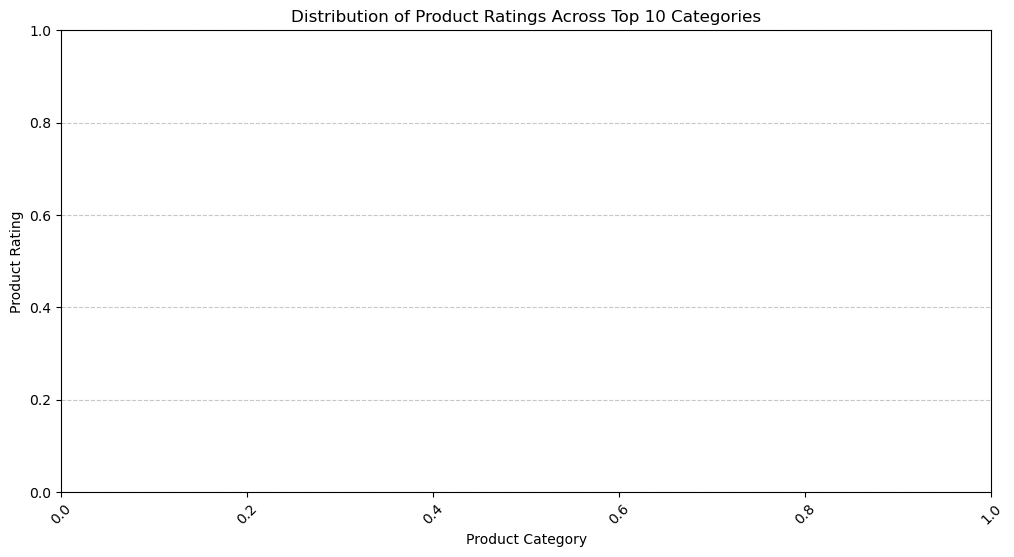

In [18]:

top_categories = df['category'].value_counts().head(10).index
df_filtered = df[df['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
#sns.boxplot(x='category', y='rating', data=df_filtered, palette="Set3")
plt.xlabel("Product Category")
plt.ylabel("Product Rating")
plt.title("Distribution of Product Ratings Across Top 10 Categories")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ELOHOR\AppData\Local\Temp\ipykernel_22232\1339105330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='category', data=avg_price, palette="coolwarm")


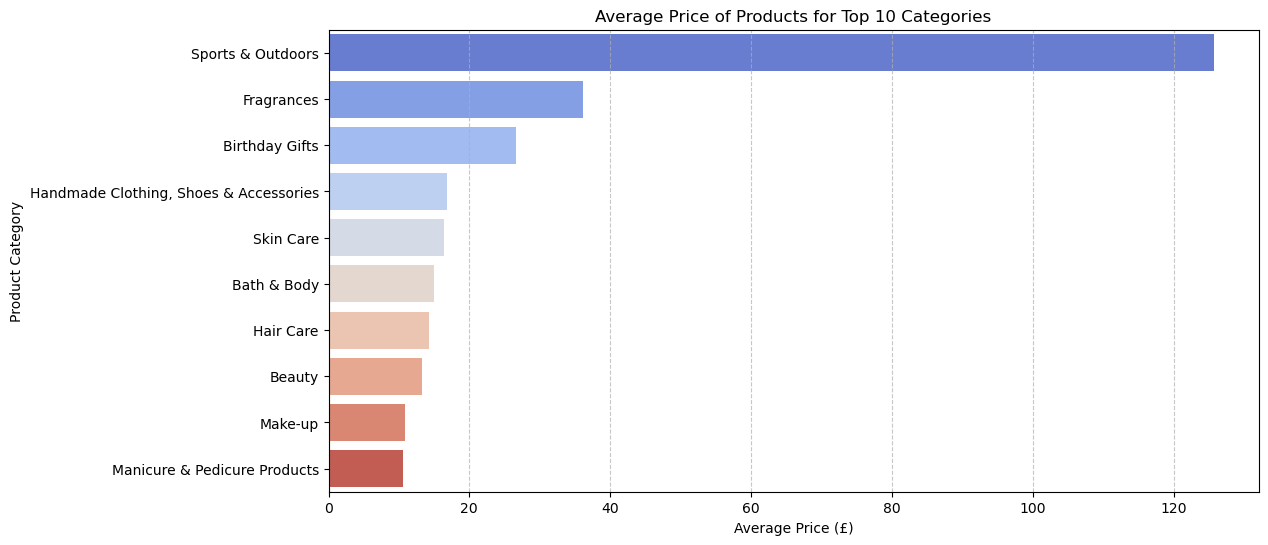

In [20]:

top_categories = df['category'].value_counts().head(10).index
df_filtered = df[df['category'].isin(top_categories)]
avg_price = df_filtered.groupby('category')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='category', data=avg_price, palette="coolwarm")
plt.xlabel("Average Price (£)")
plt.ylabel("Product Category")
plt.title("Average Price of Products for Top 10 Categories")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [21]:
# Compute Pearson correlation coefficient
correlation = df['price'].corr(df['stars'])
print(f"Correlation between Price and Stars: {correlation:.4f}")


Correlation between Price and Stars: -0.1249
